In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay  
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164185,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736359,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402916,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647964,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758377,105158200


In [5]:
df.shape

(734, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,734.000000,734.000000,734.000000,734.000000,734.000000,7.340000e+02
mean,154.935927,156.682916,153.337752,155.088883,153.819906,7.992489e+07
std,19.090207,19.103162,19.127042,19.125697,19.494719,2.770573e+07
min,119.029999,120.400002,116.209999,116.360001,114.511505,2.404830e+07
25%,141.250003,143.152496,138.802502,141.522496,140.115971,5.923115e+07
50%,151.735001,153.770004,150.130005,151.875000,150.710724,7.495655e+07
75%,171.467495,173.307499,170.190006,171.990002,170.525345,9.331740e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.954327e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       734 non-null    object 
 1   Open       734 non-null    float64
 2   High       734 non-null    float64
 3   Low        734 non-null    float64
 4   Close      734 non-null    float64
 5   Adj Close  734 non-null    float64
 6   Volume     734 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.3+ KB


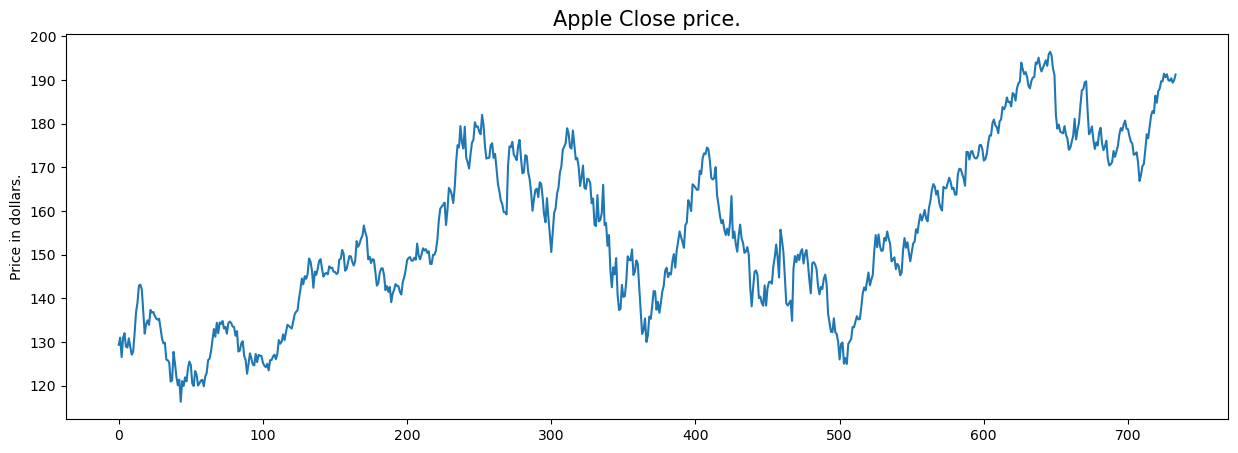

In [8]:
plt.figure(figsize=(15,5)) 
plt.plot(df['Close']) 
plt.title('Apple Close price.', fontsize=15) 
plt.ylabel('Price in dollars.') 
plt.show()

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

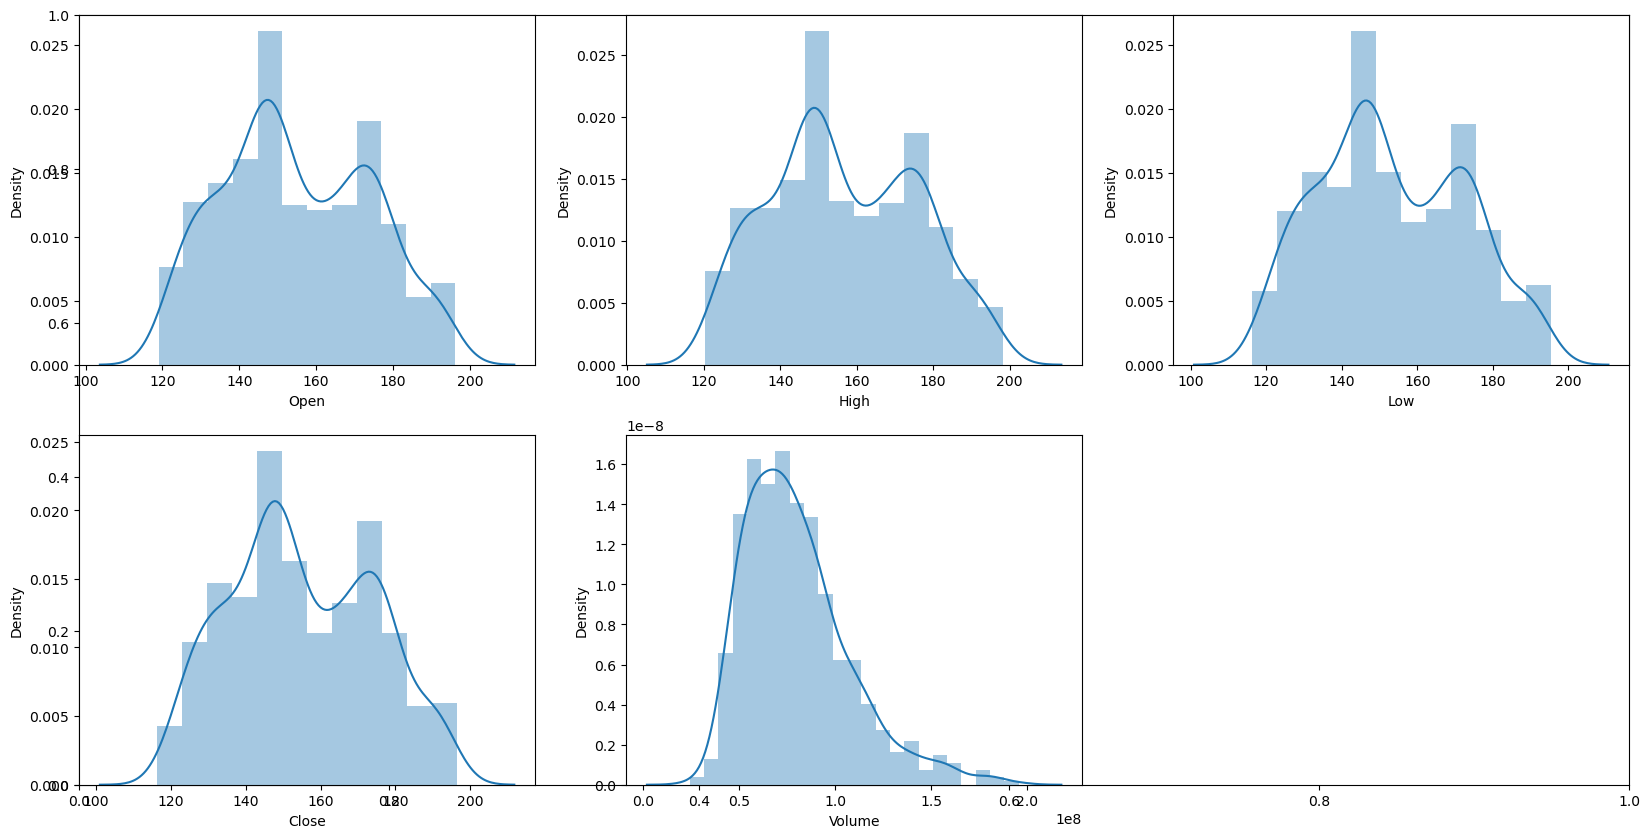

In [10]:
features = ['Open', 'High', 'Low', 'Close', 'Volume'] 
  
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.distplot(df[col]) 
plt.show()

In [14]:
splitted = df['Date'].str.split('-', expand=True) 
  
df['day'] = splitted[2].astype('int') 
df['month'] = splitted[1].astype('int') 
df['year'] = splitted[0].astype('int') 
  
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164185,143301900,4,1,2021,0
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736359,97664900,5,1,2021,0
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402916,155088000,6,1,2021,0
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647964,109578200,7,1,2021,0
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758377,105158200,8,1,2021,0


In [15]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0) 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164185,143301900,4,1,2021,0
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736359,97664900,5,1,2021,0
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402916,155088000,6,1,2021,0
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647964,109578200,7,1,2021,0
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758377,105158200,8,1,2021,0


In [18]:
df.drop('Date', axis = 1, inplace = True)

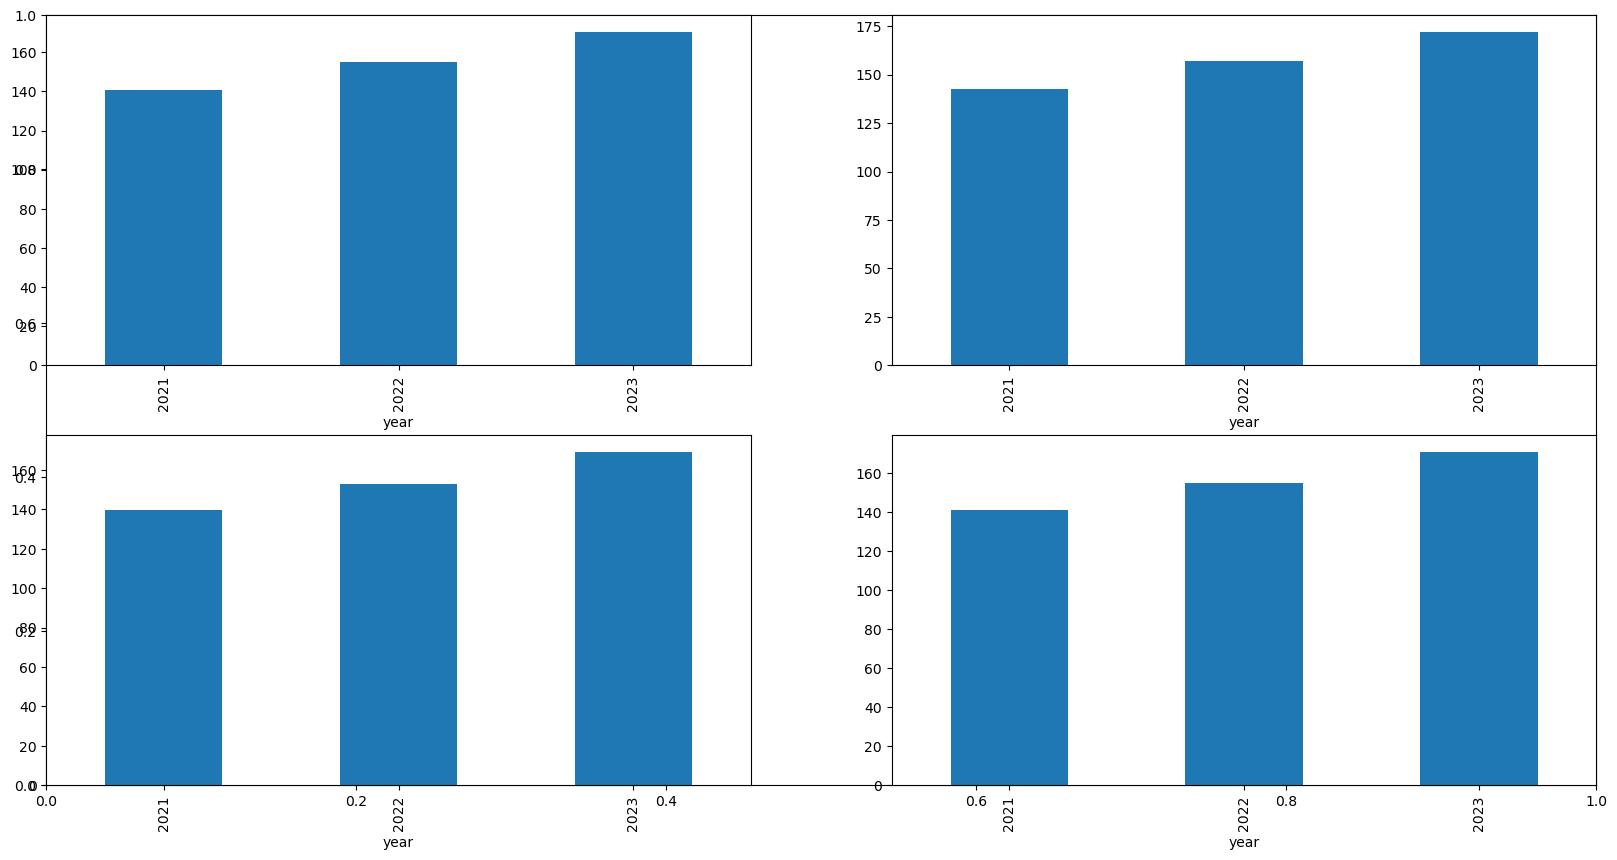

In [19]:
data_grouped = df.groupby('year').mean() 
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(['Open', 'High', 'Low', 'Close']): 
  plt.subplot(2,2,i+1) 
  data_grouped[col].plot.bar() 
plt.show()

In [20]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,155.786061,157.545778,154.241959,156.017596,154.741854,7.732177e+07,15.620202,6.125253,2022.004040
1,153.175189,154.895817,151.465021,153.165398,151.910431,8.531631e+07,15.874477,7.016736,2021.903766


In [21]:
df['open-close']  = df['Open'] - df['Close'] 
df['low-high']  = df['Low'] - df['High'] 
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

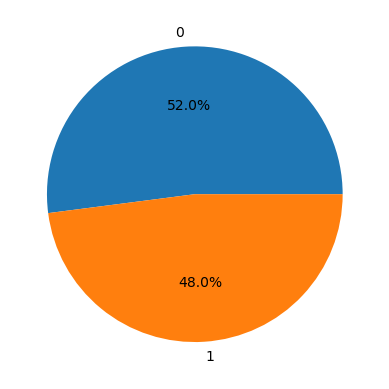

In [22]:
plt.pie(df['target'].value_counts().values,  
        labels=[0, 1], autopct='%1.1f%%') 
plt.show()

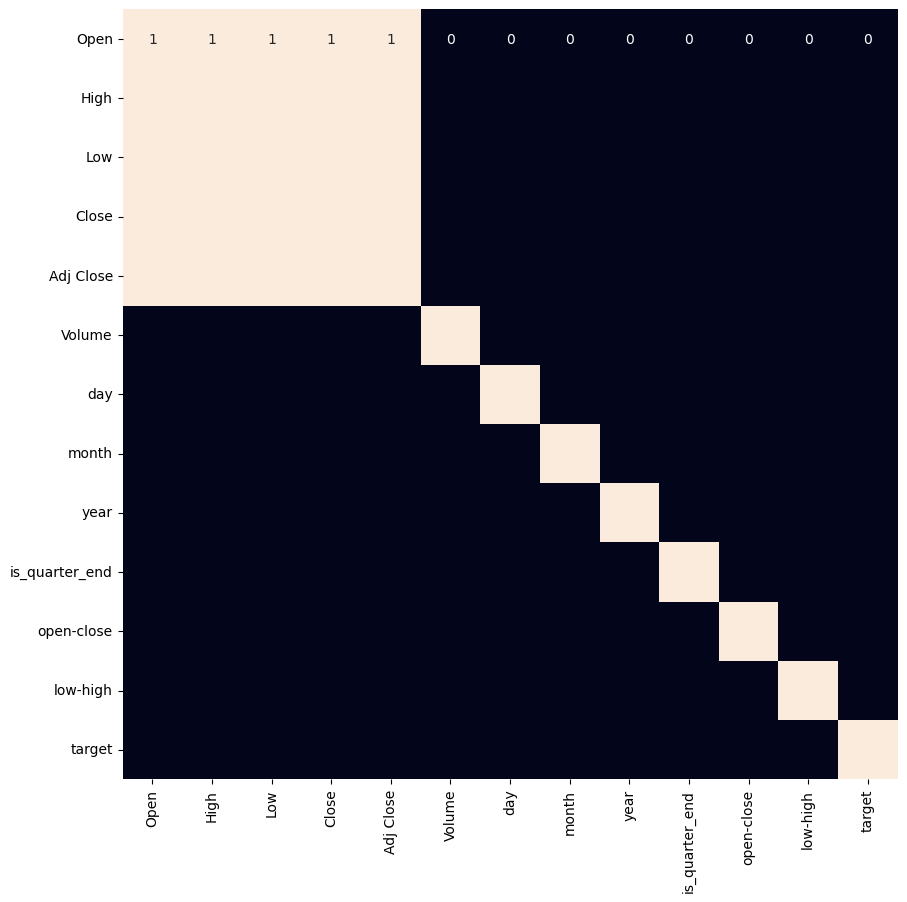

In [23]:
plt.figure(figsize=(10, 10)) 
  
# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False) 
plt.show() 

In [24]:
features = df[['open-close', 'low-high', 'is_quarter_end']] 
target = df['target'] 
  
scaler = StandardScaler() 
features = scaler.fit_transform(features) 
  
X_train, X_valid, Y_train, Y_valid = train_test_split( 
    features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape) 

(660, 3) (74, 3)


In [25]:
models = [LogisticRegression(), SVC( 
  kernel='poly', probability=True), XGBClassifier()] 
  
for i in range(3): 
  models[i].fit(X_train, Y_train) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.roc_auc_score( 
    Y_train, models[i].predict_proba(X_train)[:,1])) 
  print('Validation Accuracy : ', metrics.roc_auc_score( 
    Y_valid, models[i].predict_proba(X_valid)[:,1])) 
  print()

LogisticRegression() : 
Training Accuracy :  0.5131088216830988
Validation Accuracy :  0.45341614906832295

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4428012259517743
Validation Accuracy :  0.5318322981366459

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

In [27]:
y_pred = models[2].predict(X_valid)

In [34]:
cm = metrics.confusion_matrix(Y_valid, y_pred)

<Figure size 800x600 with 0 Axes>

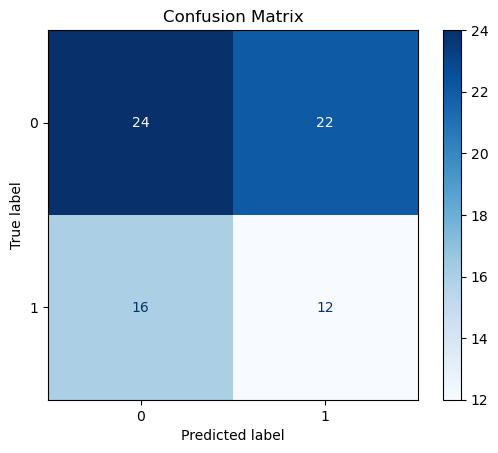

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Plotting
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()